In [50]:
import cv2
import glob
import numpy as np

X_noisy = []
files = glob.glob ("/Users/norikaisa/Downloads/Book/noisy/normal/*.png")
for myFile in files:
    image = cv2.imread (myFile)
    X_noisy.append (image)
print('X_noisy shape:', np.array(X_noisy).shape)

files = glob.glob ("/Users/norikaisa/Downloads/Book/noisy/abnormal/*.png")
for myFile in files:
    image = cv2.imread (myFile)
    X_noisy.append (image)
print('X_noisy shape:', np.array(X_noisy).shape)

X_noisy shape: (1541, 30, 50, 3)
X_noisy shape: (4306, 30, 50, 3)


In [51]:
X_unnoisy = []
files = glob.glob ("/Users/norikaisa/Downloads/Book/unnoisy total/normal/*.png")
for myFile in files[0:1541]:
    image = cv2.imread (myFile)
    X_unnoisy.append (image)
print('X_unnoisy shape:', np.array(X_unnoisy).shape)

files = glob.glob ("/Users/norikaisa/Downloads/Book/unnoisy total/abnormal/*.png")
for myFile in files[0:2765]:
    image = cv2.imread (myFile)
    X_unnoisy.append (image)
print('X_unnoisy shape:', np.array(X_unnoisy).shape)

X_unnoisy shape: (1541, 30, 50, 3)
X_unnoisy shape: (4306, 30, 50, 3)


In [52]:
X_noisy = np.array(X_noisy).astype('float32') / 255.
X_unnoisy = np.array(X_unnoisy).astype('float32') / 255.

In [53]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model 
from keras.utils import np_utils 

In [54]:
input_img = Input(shape=(30, 50, 3))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
encoded = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)

decoded = UpSampling2D((2, 2))(encoded)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [55]:
autoencoder.fit(X_noisy, X_unnoisy,
                epochs=20,
                batch_size=215,
                validation_data=(X_noisy, X_unnoisy)
               )

Train on 4306 samples, validate on 4306 samples
Epoch 1/20
4306/4306 [==============================] - 8s 2ms/step - loss: 0.5309 - val_loss: 0.2896
Epoch 2/20
4306/4306 [==============================] - 7s 2ms/step - loss: 0.2846 - val_loss: 0.2834
Epoch 3/20
4306/4306 [==============================] - 7s 2ms/step - loss: 0.2828 - val_loss: 0.2822
Epoch 4/20
4306/4306 [==============================] - 8s 2ms/step - loss: 0.2816 - val_loss: 0.2809
Epoch 5/20
4306/4306 [==============================] - 8s 2ms/step - loss: 0.2803 - val_loss: 0.2797
Epoch 6/20
4306/4306 [==============================] - 9s 2ms/step - loss: 0.2791 - val_loss: 0.2784
Epoch 7/20
4306/4306 [==============================] - 8s 2ms/step - loss: 0.2776 - val_loss: 0.2768
Epoch 8/20
4306/4306 [==============================] - 9s 2ms/step - loss: 0.2759 - val_loss: 0.2750
Epoch 9/20
4306/4306 [==============================] - 8s 2ms/step - loss: 0.2741 - val_loss: 0.2730
Epoch 10/20
4306/4306 [===========

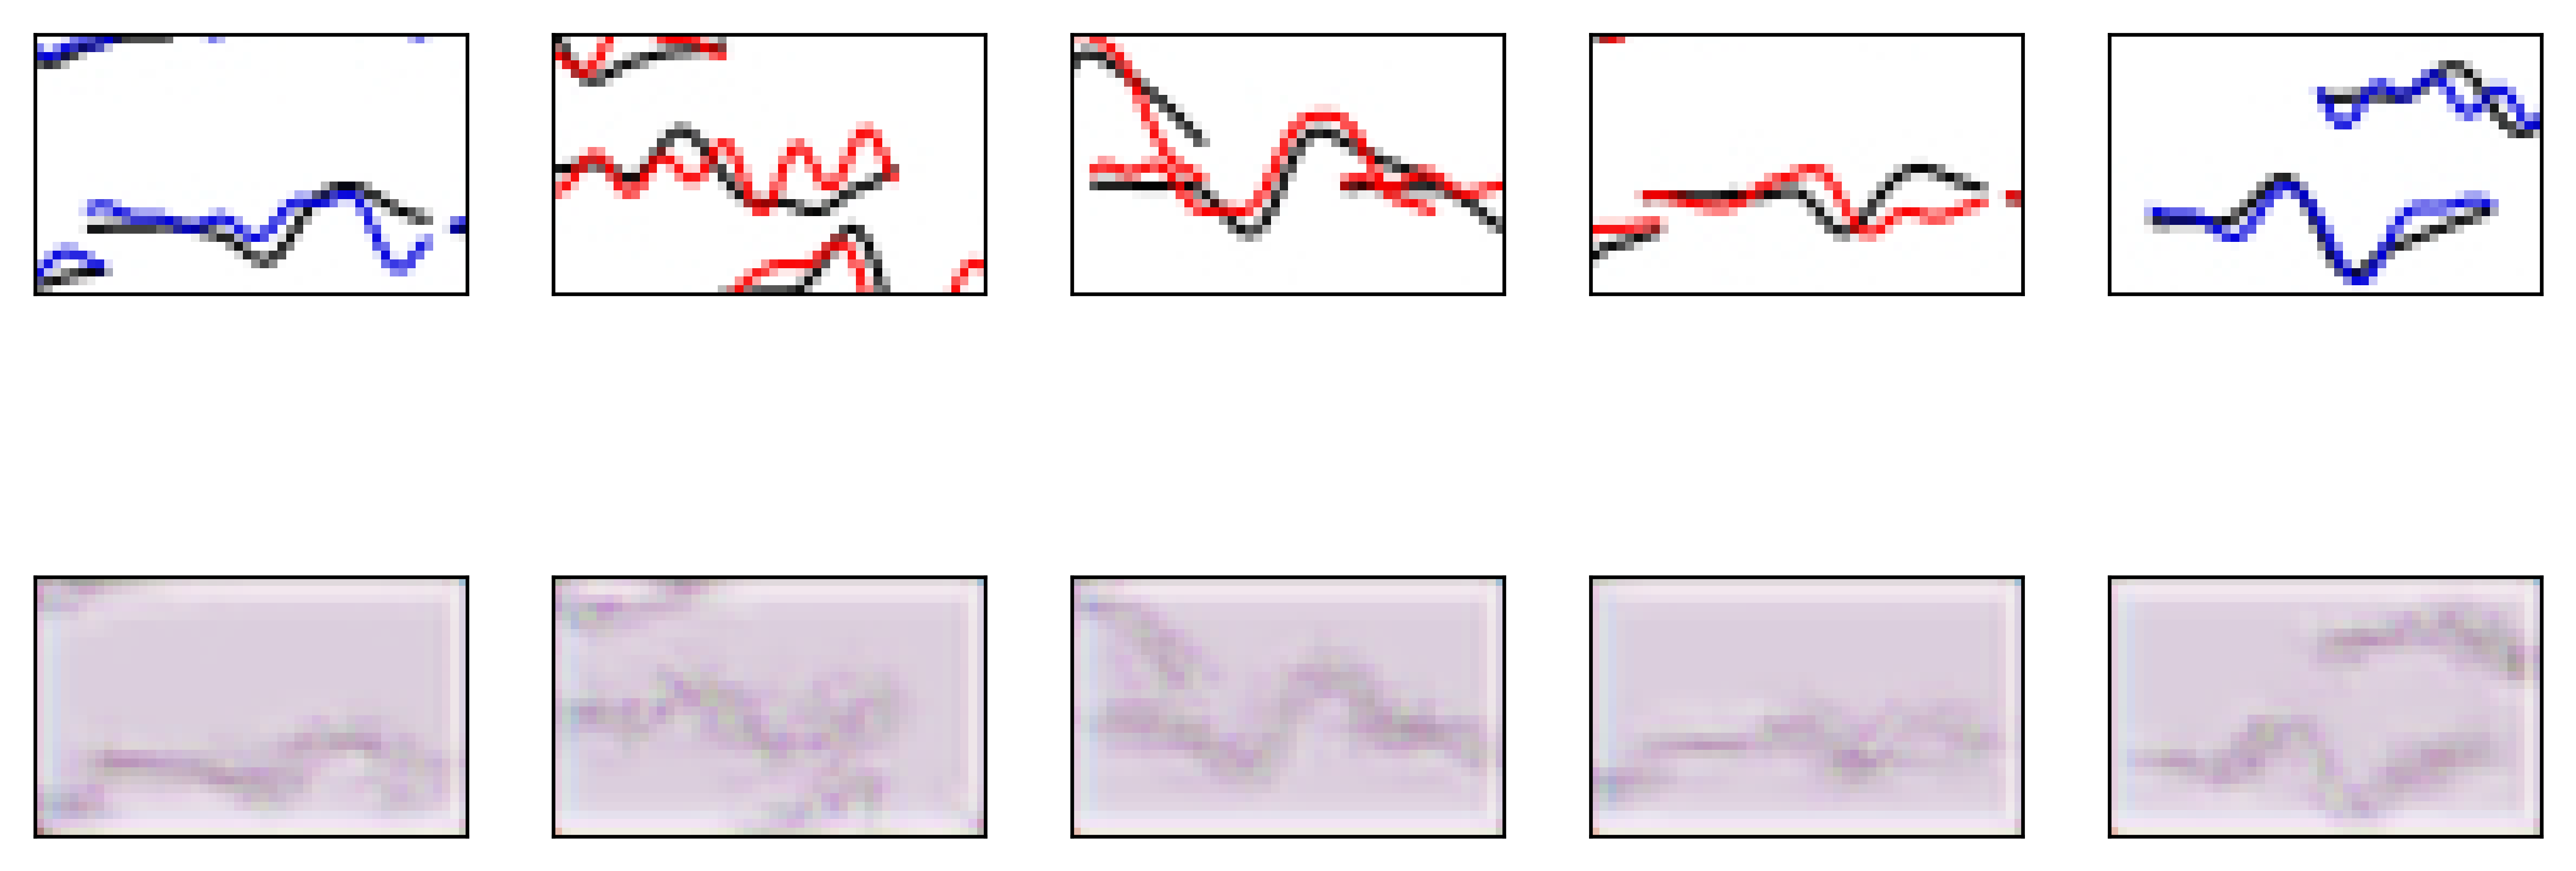

In [56]:
import matplotlib.pyplot as plt
decoded_imgs = autoencoder.predict(X_noisy)

plt.figure(figsize=(20, 4), dpi = 600)
for i in range(5):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_noisy[i+2001].reshape(30, 50, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i+2001].reshape(30, 50, 3) * decoded_imgs[i+2001].reshape(30, 50, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()